# NNIA Assignment 7

**DEADLINE: 12. 1. 2022 08:00 CET**
Submission more than 10 minutes past the deadline will **not** be graded!

- Gokul Srinivasagan (gosr00001)
- Hours of work per person: 8 hours of work

# Submission Instructions

**IMPORTANT** Please make sure you read the following instructions carefully. If you are unclear about any part of the assignment, ask questions **before** the assignment deadline. All course-related questions can be addressed on the course **[Piazza Platform](https://piazza.com/class/kvc3vzhsvh55rt)**.

* Assignments are to be submitted in a **team of 2**.
* Please include your **names**, **ID's**, **Teams usernames**, and **approximate total time spent per person** at the beginning of the Notebook in the space provided
* Make sure you appropriately comment your code wherever required.
* Your final submission should contain this completed Jupyter Notebook, including the bonus question (if you attempt it), and any necessary Python files.
* Do **not** submit any data or cache files (e.g. `__pycache__`).
* Upload the **zipped** folder (*.zip* is the only accepted extension) in **Teams**.
* Only **one member** of the group should make the submisssion.
* **Important** please name the submitted zip folder as: `Name1_id1_Name2_id2.zip`. The Jupyter Notebook should also be named: `Name1_id1_Name2_id2.ipynb`. This is **very important** for our internal organization epeatedly students fail to do this.

# Neural Network Implementation: Training and Optimization

In Assignment 5, you have implemented the forward pass and backpropagation from scratch. Congratulations! Now you can train your network.

In this exercise, we will go back to working with [the PyTorch Datasets Class](https://pytorch.org/vision/stable/datasets.html) to obtain
[the CIFAR10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html). Our goal is to benchmark our simple neural network by classifying the images in this dataset into their proper classes.

You have learned about regularization and optimization techniques during the previous lectures. In this exercise, you will get to have some more hands-on practice to improve this simple neural network.

## 1 SGD, Batch, Mini-Batch  (1.5 pts)

Recall from Assignment 5 that when we train our model, we are trying to solve the following minimization function via stochatic gradient descent:

$$ \begin{align}
\tag{15}
\min_{\theta} \tilde J (\theta) 
\end{align}$$

Typically neural networks are large and are trained with millions of data points. It is thus often infeasible to compute the gradient $\nabla_{\theta} \tilde J(\theta)$ that requires the accumulation of the gradient over the entire training set. 

There are various online resources on Stochastic, Batch, and Minit-Gradient Descent methods in addition to what was covered during the lecture. Here are a few:

- [Medium: Batch , Mini-Batch and Stochastic gradient descent](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461)
- [DeepLearningAI: Batch vs Mini-Batch](https://youtu.be/4qJaSmvhxi8)

**Discuss pros and cons of (1) stochastic (m=1), (2) batch (m = size of dataset) and (3) mini-batch gradient descent** (m is the number of points passed at a time).

## <font color="red">Done</font>


### 1

- Stochastic: 

Stochastic Gradient Descent is a variation of the gradient descent that calculates the error and updates the model for each record in the training datasets.

Pros:
1. Weight updates is faster
2. Loss function is not supposed to wait for the entire datasets to calculate itself.
3. Optimizer is not supposed to wait for entire datasets to calculate itself.
4. Memory consumptions will also be low.
5. SGD is faster than MGD and BGD.

Cons:
1. SGD have huge oscillations. So, SGD will always vary from one point to another for each and every datasets. Hence, its hard to get an absolute minima. And we will end up getting a multiple minima points.
2. We need to control the learning rate. If learning rate is too high, some other dataset may not show the same properties. The learning rate effect in SGD will be little but lesser as compare to the BGD and MGD.


- Batch: 

Batch Gradient Descent is a variation of the gradient descent algorithm that calculates the error for each example in the training datasets, but updates the model after all training examples have been evaluated.

Pros:
1. Computationally Efficient
2. It is a learnable parameter - while calculate a new weight, we consider all the data by the summation of the loss. 

Cons:
1. Memory consumption is too high - we need to store the loss which we have received in each and every iterations
2. Optimization will be slower as compared to any other optimizer - Since memory consumption is very high, the computation will be slow.

- Mini-Batch: 

Mini-Batch Gradient Descent is a variation of the gradient descent algorithm that splits the training datasets into small batches that are used to calculate model error and update model coefficients.

Pros:
1. The model update frequency is higher than Batch Gradient Descent
2. The batching allows both efficiency of not having all training data in memory and algorithms implementations. 
3. The batch updates provide a computationally more efficient process than SGD.

Cons:
1. No guarantee of convergence of a error in a better way.
2. It is hard to get absolute global or local minima at any point of a time - since the sample records we take are not representing the properties (or variance) of entire datasets.
3. We need to control the learning rate while using MGD .If learning rate is very low, the convergence rate will also be low. If learning rate is too high, we won’t get an absolute global or local minima.

Reference : https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461

## 2: Training Implementation (4 pts)

In this question we will implement the `training` and `predicting` functions to the *NeuralNetworkModel* Class in `solution.py` we worked on previously in the last assignment. The inialization and the loss computation is provided as a solution from the previous assignment. You may use your own implementation from the previous assignment or the one provided as long as you get similar results.

In this exercise, you will be following the Mini-Batch Gradient Descent approach in training the model. The skeleton code in `solution.py` includes momentum in the training.(You can read more about what that is in [Chapter 8: Optimization for Training Deep Models](https://www.deeplearningbook.org/contents/optimization.html) in [Goodfellow et al. (2016)](https://www.deeplearningbook.org/))

### 2.1 Write the pseudocode steps for updating the gradients in a mini-batch gradient descent algorithm (1 pt)
Make sure to include learning rate, batch-size, iteration limit.

### 2.2 Implementation (2 pt)
Implement the `train` and `predict` functions in `solution.py`. Use the following default hyperparameters to train your model:

* num_epocs = 4
* learning_rate = 1e-5
* reg = 0.1
* learning_rate_decay = 0.95

(Hint: with the deafult parameters above, you should get the validation accuracy of around 23%.)

### 2.3 Ploting (1 pt)
One strategy for getting insight into what's going on during training is to plot the loss and the accuracies on the training and validation sets. Submit 2 plots: (1) Loss vs loss update steps (2) training and validation accuracies vs Iterations(Epochs)

**Implement the code in `solution.py`** 

## 2 <font color="red"> Done </font>



In [ ]:
# Pseudocode: 

# Let, theta = model parameters

# for i = 1 to num_of_epoch do
#     for mini_batch (X_mini, y_mini) do
#         Forward Pass on the batch:
#             Make predictions on the mini-batch (X_mini)
#             Compute loss in predictions (J(theta)) with the current values of the parameters
#         Backward Pass:
#             Compute gradient(theta) = partial derivative of J(theta) w.r.t. theta
#         Update parameters:
#             theta = theta – learning_rate*gradient(theta)

# Ref: https://www.geeksforgeeks.org/ml-mini-batch-gradient-descent-with-python/

**Fill in the missing code below to load the dataset**

You may need to import necessary modules.

In [53]:
%load_ext autoreload
%autoreload 2

In [1]:
from solution import NeuralNetworkModel, get_cifar10_dataset

train_loader, test_loader, val_loader, classes = get_cifar10_dataset(val_size=1000, batch_size=200)
X_val, y_val = next(iter(val_loader))
X_test, y_test = next(iter(test_loader))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [5]:
# Train the network with default hyperparameters

net = NeuralNetworkModel(3072,50,10)
results = net.train(train_loader, X_val, y_val, learning_rate=1e-5, learning_rate_decay=0.95,reg=0.1, num_epochs=4, verbose=True)

batch 1 / 245: loss 2.302682
batch 101 / 245: loss 2.301886
batch 201 / 245: loss 2.300958
Epoch 1 / 4:
Training Accuracy: 0.11833333333333333
Validation Accuracy: 0.125
Loss: 2.2961048725154334
batch 1 / 245: loss 2.297948
batch 101 / 245: loss 2.267357
batch 201 / 245: loss 2.244357
Epoch 2 / 4:
Training Accuracy: 0.14833333333333334
Validation Accuracy: 0.171
Loss: 2.2103715976270393
batch 1 / 245: loss 2.211714
batch 101 / 245: loss 2.204091
batch 201 / 245: loss 2.111798
Epoch 3 / 4:
Training Accuracy: 0.20166666666666666
Validation Accuracy: 0.181
Loss: 2.1168860159193517
batch 1 / 245: loss 2.117382
batch 101 / 245: loss 2.069229
batch 201 / 245: loss 2.066329
Epoch 4 / 4:
Training Accuracy: 0.18999999999999997
Validation Accuracy: 0.233
Loss: 2.1030783114704055


In [ ]:
# Show your plots here. Make sure to label your axes and give descriptive titles.

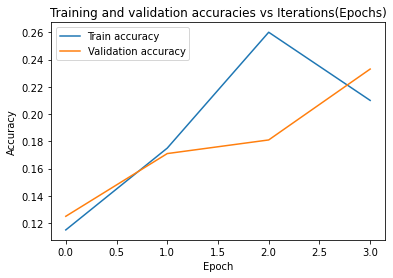

In [6]:
from solution1 import *

val_acc_plot(results)

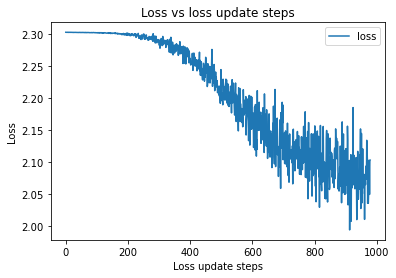

In [8]:
loss_plot(results)

## 3 Fine-Tuning (2 pts + 1 Bonus pts)

With default hyperparameters, if previous questions have been done correctly, you should get validation set accuracy of at least around 23%. Can we do better?. 

### Fine-Tuning (1 + 1 = 2 pts)

Your task is to fine-tune the model training and come up with a better set of hyper-parameters to improve the performance on the validation set from the default results. **(1 pt)** Visualize the training and validation performance curves to help with this analysis.

(Note: if you decided to change the batch size from 200, with the way the skeleton code is implemented, you will have to adjust this in the `get_cifar10_dataset` function and reload your Dataloaders.)

**Justify** The hyperparameters you are modifying and **discuss** the effects of adjusting these hyperparameters on your validation results. **(1 pt)**

**Bonus 1 pt:** Experiment with different combinations of hyperparameters and report the evaluation results on the test set from your best model.



## 3 <font color="red"> Done </font>

The performance of the model can be further improved by fine tuning the hyper parameters.

batch 1 / 245: loss 2.302685
batch 101 / 245: loss 2.188597
batch 201 / 245: loss 1.995296
Epoch 1 / 25:
Training Accuracy: 0.20166666666666666
Validation Accuracy: 0.288
Loss: 2.0191638111914045
batch 1 / 245: loss 1.999698
batch 101 / 245: loss 1.984229
batch 201 / 245: loss 1.879646
Epoch 2 / 25:
Training Accuracy: 0.325
Validation Accuracy: 0.345
Loss: 1.818232075584379
batch 1 / 245: loss 1.792456
batch 101 / 245: loss 1.774545
batch 201 / 245: loss 1.980409
Epoch 3 / 25:
Training Accuracy: 0.34833333333333333
Validation Accuracy: 0.38
Loss: 1.8289994562050007
batch 1 / 245: loss 1.797744
batch 101 / 245: loss 1.818070
batch 201 / 245: loss 1.761796
Epoch 4 / 25:
Training Accuracy: 0.37999999999999995
Validation Accuracy: 0.386
Loss: 1.6187101534010049
batch 1 / 245: loss 1.721517
batch 101 / 245: loss 1.670487
batch 201 / 245: loss 1.631208
Epoch 5 / 25:
Training Accuracy: 0.4183333333333334
Validation Accuracy: 0.409
Loss: 1.7393701955736265
batch 1 / 245: loss 1.691639
batch 10

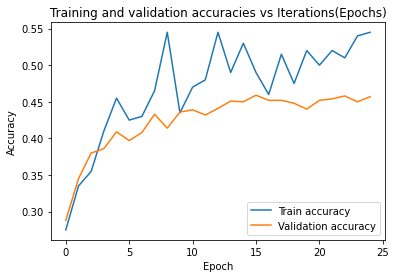

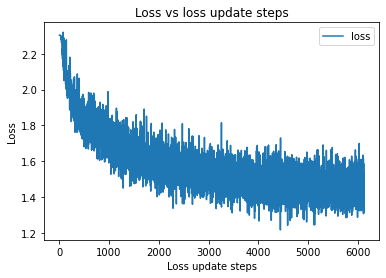

In [9]:
net = NeuralNetworkModel(3072,50,10)
results = net.train(train_loader, X_val, y_val, learning_rate=1e-4, learning_rate_decay=0.90,reg=0.2, num_epochs=25, verbose=True)

val_acc_plot(results)
loss_plot(results)

We have modified the following hyperparameters and got an validation accuracy of 45.7%.

learning rate - The learning rate controls how quickly the model is adapted to the problem. By incresing the learning rate to 1e-4, we require fewer training epochs for a model to converge to a local or global minima.

learning rate decay - Decaying the learning rate can help model converge to better minima. This is because with the fixed learning rate the model may continually miss the actual minima by going back and forth across it. So decaying the learning rate will allow our weights to settle into these sharp minima.

reg - To a certain point, increase in regularization term reduces the variance(hence avoiding overfitting), without loosing any important properties in the data.

number of epochs - Incresing epochs makes our model to learn more accurately from the training data.

In [ ]:
## Bonus work ##

In [24]:
net = NeuralNetworkModel(3072,50,10)
results = net.train(train_loader, X_val, y_val, learning_rate=1e-4, learning_rate_decay=0.90,reg=0.2, num_epochs=25, verbose=True)

batch 1 / 245: loss 2.302587
batch 101 / 245: loss 2.213867
batch 201 / 245: loss 2.031492
Epoch 1 / 25:
Training Accuracy: 0.18000000000000002
Validation Accuracy: 0.323
Loss: 1.8805054036113362
batch 1 / 245: loss 1.970750
batch 101 / 245: loss 1.944402
batch 201 / 245: loss 1.877633
Epoch 2 / 25:
Training Accuracy: 0.3383333333333334
Validation Accuracy: 0.325
Loss: 1.9205920334230457
batch 1 / 245: loss 1.812798
batch 101 / 245: loss 1.782185
batch 201 / 245: loss 1.810237
Epoch 3 / 25:
Training Accuracy: 0.3833333333333333
Validation Accuracy: 0.357
Loss: 1.7476364396919302
batch 1 / 245: loss 1.741242
batch 101 / 245: loss 1.762374
batch 201 / 245: loss 1.676666
Epoch 4 / 25:
Training Accuracy: 0.4366666666666667
Validation Accuracy: 0.399
Loss: 1.7132893939992808
batch 1 / 245: loss 1.679284
batch 101 / 245: loss 1.749993
batch 201 / 245: loss 1.646137
Epoch 5 / 25:
Training Accuracy: 0.40166666666666667
Validation Accuracy: 0.388
Loss: 1.6406171866714119
batch 1 / 245: loss 1.7

In [25]:
net = NeuralNetworkModel(3072,50,10)
results = net.train(train_loader, X_val, y_val, learning_rate=1e-4, learning_rate_decay=0.95,reg=0.2, num_epochs=25, verbose=True)

batch 1 / 245: loss 2.302546
batch 101 / 245: loss 2.234205
batch 201 / 245: loss 2.015746
Epoch 1 / 25:
Training Accuracy: 0.205
Validation Accuracy: 0.283
Loss: 1.9161560458426106
batch 1 / 245: loss 1.833160
batch 101 / 245: loss 2.025225
batch 201 / 245: loss 1.796212
Epoch 2 / 25:
Training Accuracy: 0.31333333333333335
Validation Accuracy: 0.327
Loss: 1.876120661202259
batch 1 / 245: loss 1.872604
batch 101 / 245: loss 1.744216
batch 201 / 245: loss 1.716715
Epoch 3 / 25:
Training Accuracy: 0.3983333333333334
Validation Accuracy: 0.366
Loss: 1.577298143527154
batch 1 / 245: loss 1.758146
batch 101 / 245: loss 1.864520
batch 201 / 245: loss 1.766670
Epoch 4 / 25:
Training Accuracy: 0.4083333333333334
Validation Accuracy: 0.345
Loss: 1.7804997957842472
batch 1 / 245: loss 1.948658
batch 101 / 245: loss 1.753618
batch 201 / 245: loss 1.667417
Epoch 5 / 25:
Training Accuracy: 0.3833333333333333
Validation Accuracy: 0.403
Loss: 1.6030736840254551
batch 1 / 245: loss 1.679412
batch 101 

In [26]:
net = NeuralNetworkModel(3072,50,10)
results = net.train(train_loader, X_val, y_val, learning_rate=1e-4, learning_rate_decay=0.95,reg=0.3, num_epochs=25, verbose=False)

In [27]:
results

{'loss_history': [2.302685696066657,
  2.3024311290721697,
  2.3028448400567156,
  2.302505753575784,
  2.302089565184157,
  2.302445209257553,
  2.302128880542265,
  2.3022503500146176,
  2.302124400426951,
  2.301769187573019,
  2.3015595158563937,
  2.301697890014576,
  2.3004204892585487,
  2.300023100382484,
  2.3005171810038005,
  2.300252836529673,
  2.3004376874481114,
  2.302307716032422,
  2.300652833266728,
  2.2997291658911054,
  2.2971271602810885,
  2.2974328700290045,
  2.29943263036921,
  2.297823334491799,
  2.2968997023226967,
  2.298076224094969,
  2.2966649984580916,
  2.292584536203842,
  2.290316183910361,
  2.2874776962977217,
  2.2876838280724723,
  2.2947607511960233,
  2.285276579729969,
  2.286703490470882,
  2.2834757840099336,
  2.2916263516967064,
  2.283131406594233,
  2.2935620981154052,
  2.2819698716323633,
  2.276162108198266,
  2.272085156660626,
  2.2544397645815737,
  2.2458610239367927,
  2.2541510297920966,
  2.2505549874913515,
  2.2502896014528

In [29]:
net = NeuralNetworkModel(3072,50,10)
results = net.train(train_loader, X_val, y_val, learning_rate=1e-5, learning_rate_decay=0.95,reg=0.3, num_epochs=25, verbose=True)

batch 1 / 245: loss 2.302518
batch 101 / 245: loss 2.302068
batch 201 / 245: loss 2.299563
Epoch 1 / 25:
Training Accuracy: 0.10333333333333335
Validation Accuracy: 0.095
Loss: 2.2967816396541116
batch 1 / 245: loss 2.294910
batch 101 / 245: loss 2.285485
batch 201 / 245: loss 2.254644
Epoch 2 / 25:
Training Accuracy: 0.135
Validation Accuracy: 0.178
Loss: 2.2384743054786744
batch 1 / 245: loss 2.227282
batch 101 / 245: loss 2.156085
batch 201 / 245: loss 2.160575
Epoch 3 / 25:
Training Accuracy: 0.16166666666666665
Validation Accuracy: 0.223
Loss: 2.1058306914340372
batch 1 / 245: loss 2.125416
batch 101 / 245: loss 2.062168
batch 201 / 245: loss 2.057617
Epoch 4 / 25:
Training Accuracy: 0.21166666666666667
Validation Accuracy: 0.262
Loss: 2.0578322174041315
batch 1 / 245: loss 2.055737
batch 101 / 245: loss 2.020801
batch 201 / 245: loss 2.053882
Epoch 5 / 25:
Training Accuracy: 0.2733333333333333
Validation Accuracy: 0.269
Loss: 2.0256672857973665
batch 1 / 245: loss 2.007253
batch 

In [30]:
net = NeuralNetworkModel(3072,50,10)
results = net.train(train_loader, X_val, y_val, learning_rate=5e-5, learning_rate_decay=0.90,reg=0.3, num_epochs=100, verbose=True)

batch 1 / 245: loss 2.302562
batch 101 / 245: loss 2.187406
batch 201 / 245: loss 2.158951
Epoch 1 / 100:
Training Accuracy: 0.17333333333333334
Validation Accuracy: 0.251
Loss: 2.0119588851490313
batch 1 / 245: loss 2.032497
batch 101 / 245: loss 1.995803
batch 201 / 245: loss 1.905514
Epoch 2 / 100:
Training Accuracy: 0.2816666666666667
Validation Accuracy: 0.308
Loss: 1.9927871204269099
batch 1 / 245: loss 1.916805
batch 101 / 245: loss 1.809984
batch 201 / 245: loss 1.888728
Epoch 3 / 100:
Training Accuracy: 0.325
Validation Accuracy: 0.343
Loss: 1.8589015201047323
batch 1 / 245: loss 1.829905
batch 101 / 245: loss 1.759708
batch 201 / 245: loss 1.665138
Epoch 4 / 100:
Training Accuracy: 0.36000000000000004
Validation Accuracy: 0.342
Loss: 1.8574772139239877
batch 1 / 245: loss 1.763492
batch 101 / 245: loss 1.664137
batch 201 / 245: loss 1.772685
Epoch 5 / 100:
Training Accuracy: 0.4166666666666667
Validation Accuracy: 0.38
Loss: 1.7050103165342754
batch 1 / 245: loss 1.698470
bat

Epoch 43 / 100:
Training Accuracy: 0.43500000000000005
Validation Accuracy: 0.457
Loss: 1.6255598804884286
batch 1 / 245: loss 1.561785
batch 101 / 245: loss 1.568085
batch 201 / 245: loss 1.574807
Epoch 44 / 100:
Training Accuracy: 0.47833333333333333
Validation Accuracy: 0.455
Loss: 1.4035651045390067
batch 1 / 245: loss 1.487318
batch 101 / 245: loss 1.511114
batch 201 / 245: loss 1.500600
Epoch 45 / 100:
Training Accuracy: 0.4983333333333333
Validation Accuracy: 0.449
Loss: 1.6617385028475171
batch 1 / 245: loss 1.513812
batch 101 / 245: loss 1.563807
batch 201 / 245: loss 1.497818
Epoch 46 / 100:
Training Accuracy: 0.455
Validation Accuracy: 0.454
Loss: 1.5369041893585682
batch 1 / 245: loss 1.627171
batch 101 / 245: loss 1.574137
batch 201 / 245: loss 1.543996
Epoch 47 / 100:
Training Accuracy: 0.4283333333333333
Validation Accuracy: 0.454
Loss: 1.5861215697022857
batch 1 / 245: loss 1.577464
batch 101 / 245: loss 1.436678
batch 201 / 245: loss 1.544666
Epoch 48 / 100:
Training A

batch 1 / 245: loss 1.601270
batch 101 / 245: loss 1.569783
batch 201 / 245: loss 1.542753
Epoch 86 / 100:
Training Accuracy: 0.445
Validation Accuracy: 0.454
Loss: 1.5961788744933125
batch 1 / 245: loss 1.400964
batch 101 / 245: loss 1.525950
batch 201 / 245: loss 1.669725
Epoch 87 / 100:
Training Accuracy: 0.45999999999999996
Validation Accuracy: 0.454
Loss: 1.44714748130182
batch 1 / 245: loss 1.558600
batch 101 / 245: loss 1.436523
batch 201 / 245: loss 1.588567
Epoch 88 / 100:
Training Accuracy: 0.4683333333333333
Validation Accuracy: 0.454
Loss: 1.5907132646974924
batch 1 / 245: loss 1.489831
batch 101 / 245: loss 1.403288
batch 201 / 245: loss 1.535995
Epoch 89 / 100:
Training Accuracy: 0.49499999999999994
Validation Accuracy: 0.454
Loss: 1.5294141300109758
batch 1 / 245: loss 1.553966
batch 101 / 245: loss 1.595207
batch 201 / 245: loss 1.542082
Epoch 90 / 100:
Training Accuracy: 0.43333333333333335
Validation Accuracy: 0.454
Loss: 1.5873716498075499
batch 1 / 245: loss 1.49414

In [31]:
net = NeuralNetworkModel(3072,50,10)
results = net.train(train_loader, X_val, y_val, learning_rate=1e-4, learning_rate_decay=0.90,reg=0.4, num_epochs=25, verbose=True)

batch 1 / 245: loss 2.302649
batch 101 / 245: loss 2.136199
batch 201 / 245: loss 1.931389
Epoch 1 / 25:
Training Accuracy: 0.22166666666666668
Validation Accuracy: 0.3
Loss: 1.9621173252516062
batch 1 / 245: loss 1.965027
batch 101 / 245: loss 1.811583
batch 201 / 245: loss 1.820996
Epoch 2 / 25:
Training Accuracy: 0.36000000000000004
Validation Accuracy: 0.33
Loss: 1.8986787198289234
batch 1 / 245: loss 1.818192
batch 101 / 245: loss 1.969530
batch 201 / 245: loss 1.761514
Epoch 3 / 25:
Training Accuracy: 0.38833333333333336
Validation Accuracy: 0.352
Loss: 1.8641125845920812
batch 1 / 245: loss 1.784503
batch 101 / 245: loss 1.886909
batch 201 / 245: loss 1.743610
Epoch 4 / 25:
Training Accuracy: 0.38999999999999996
Validation Accuracy: 0.377
Loss: 1.7303033922211761
batch 1 / 245: loss 1.726365
batch 101 / 245: loss 1.837124
batch 201 / 245: loss 1.605476
Epoch 5 / 25:
Training Accuracy: 0.42166666666666663
Validation Accuracy: 0.388
Loss: 1.6898216344250665
batch 1 / 245: loss 1.6

In [32]:
net = NeuralNetworkModel(3072,50,10)
results = net.train(train_loader, X_val, y_val, learning_rate=1e-4, learning_rate_decay=0.90,reg=0.5, num_epochs=25, verbose=True)

batch 1 / 245: loss 2.302625
batch 101 / 245: loss 2.105377
batch 201 / 245: loss 2.188561
Epoch 1 / 25:
Training Accuracy: 0.215
Validation Accuracy: 0.315
Loss: 1.9751682146292824
batch 1 / 245: loss 1.982925
batch 101 / 245: loss 1.768020
batch 201 / 245: loss 1.951438
Epoch 2 / 25:
Training Accuracy: 0.33666666666666667
Validation Accuracy: 0.347
Loss: 1.7312066343187298
batch 1 / 245: loss 1.845696
batch 101 / 245: loss 1.811150
batch 201 / 245: loss 1.788327
Epoch 3 / 25:
Training Accuracy: 0.37166666666666665
Validation Accuracy: 0.358
Loss: 1.760582913839049
batch 1 / 245: loss 1.806289
batch 101 / 245: loss 1.749409
batch 201 / 245: loss 1.642843
Epoch 4 / 25:
Training Accuracy: 0.4116666666666666
Validation Accuracy: 0.366
Loss: 1.8310240863530802
batch 1 / 245: loss 1.668569
batch 101 / 245: loss 1.611472
batch 201 / 245: loss 1.776378
Epoch 5 / 25:
Training Accuracy: 0.41
Validation Accuracy: 0.414
Loss: 1.8133090974480068
batch 1 / 245: loss 1.674364
batch 101 / 245: loss 

In [33]:
from solution import NeuralNetworkModel, get_cifar10_dataset

train_loader, test_loader, val_loader, classes = get_cifar10_dataset(val_size=1000, batch_size=100)
X_val, y_val = next(iter(val_loader))
X_test, y_test = next(iter(test_loader))

net = NeuralNetworkModel(3072,50,10)
results = net.train(train_loader, X_val, y_val, learning_rate=1e-4, learning_rate_decay=0.95,reg=0.4, num_epochs=25, verbose=True)

Files already downloaded and verified
Files already downloaded and verified
batch 1 / 490: loss 2.302529
batch 101 / 490: loss 2.150552
batch 201 / 490: loss 1.870362
batch 301 / 490: loss 1.889812
batch 401 / 490: loss 1.875556
Epoch 1 / 25:
Training Accuracy: 0.282
Validation Accuracy: 0.32
Loss: 1.7157045558829165
batch 1 / 490: loss 1.903279
batch 101 / 490: loss 1.841273
batch 201 / 490: loss 1.784718
batch 301 / 490: loss 1.910086
batch 401 / 490: loss 1.876588
Epoch 2 / 25:
Training Accuracy: 0.392
Validation Accuracy: 0.362
Loss: 1.8022443467732083
batch 1 / 490: loss 1.649062
batch 101 / 490: loss 2.001472
batch 201 / 490: loss 1.855575
batch 301 / 490: loss 1.739192
batch 401 / 490: loss 1.640531
Epoch 3 / 25:
Training Accuracy: 0.406
Validation Accuracy: 0.354
Loss: 1.8496350787642484
batch 1 / 490: loss 1.813102
batch 101 / 490: loss 1.610734
batch 201 / 490: loss 1.598182
batch 301 / 490: loss 1.692841
batch 401 / 490: loss 1.651291
Epoch 4 / 25:
Training Accuracy: 0.46199

In [34]:
from solution import NeuralNetworkModel, get_cifar10_dataset

train_loader, test_loader, val_loader, classes = get_cifar10_dataset(val_size=1000, batch_size=50)
X_val, y_val = next(iter(val_loader))
X_test, y_test = next(iter(test_loader))

net = NeuralNetworkModel(3072,50,10)
results = net.train(train_loader, X_val, y_val, learning_rate=1e-4, learning_rate_decay=0.95,reg=0.4, num_epochs=25, verbose=True)

Files already downloaded and verified
Files already downloaded and verified
batch 1 / 980: loss 2.302454
batch 101 / 980: loss 2.227887
batch 201 / 980: loss 1.968824
batch 301 / 980: loss 2.060275
batch 401 / 980: loss 1.806931
batch 501 / 980: loss 1.853218
batch 601 / 980: loss 1.817692
batch 701 / 980: loss 1.997893
batch 801 / 980: loss 1.763756
batch 901 / 980: loss 1.780659
Epoch 1 / 25:
Training Accuracy: 0.348
Validation Accuracy: 0.349
Loss: 1.7395871397635958
batch 1 / 980: loss 1.966386
batch 101 / 980: loss 1.768992
batch 201 / 980: loss 1.939719
batch 301 / 980: loss 1.652696
batch 401 / 980: loss 1.553628
batch 501 / 980: loss 1.819983
batch 601 / 980: loss 1.862195
batch 701 / 980: loss 1.626589
batch 801 / 980: loss 2.020445
batch 901 / 980: loss 1.748476
Epoch 2 / 25:
Training Accuracy: 0.438
Validation Accuracy: 0.392
Loss: 1.575012032192236
batch 1 / 980: loss 1.989233
batch 101 / 980: loss 1.555144
batch 201 / 980: loss 1.677150
batch 301 / 980: loss 1.751890
batch

batch 101 / 980: loss 1.453464
batch 201 / 980: loss 1.365153
batch 301 / 980: loss 1.458994
batch 401 / 980: loss 1.316125
batch 501 / 980: loss 1.129432
batch 601 / 980: loss 1.493691
batch 701 / 980: loss 1.362823
batch 801 / 980: loss 1.314170
batch 901 / 980: loss 1.154515
Epoch 21 / 25:
Training Accuracy: 0.618
Validation Accuracy: 0.46
Loss: 1.2270812112263598
batch 1 / 980: loss 1.261592
batch 101 / 980: loss 1.748182
batch 201 / 980: loss 1.201673
batch 301 / 980: loss 1.353918
batch 401 / 980: loss 1.283068
batch 501 / 980: loss 1.378882
batch 601 / 980: loss 1.541514
batch 701 / 980: loss 1.439864
batch 801 / 980: loss 1.452947
batch 901 / 980: loss 1.514080
Epoch 22 / 25:
Training Accuracy: 0.556
Validation Accuracy: 0.465
Loss: 0.9876804277490154
batch 1 / 980: loss 1.644872
batch 101 / 980: loss 1.369350
batch 201 / 980: loss 1.424270
batch 301 / 980: loss 1.218503
batch 401 / 980: loss 1.523257
batch 501 / 980: loss 1.449864
batch 601 / 980: loss 1.349151
batch 701 / 980

In [35]:
from solution import NeuralNetworkModel, get_cifar10_dataset

train_loader, test_loader, val_loader, classes = get_cifar10_dataset(val_size=1000, batch_size=50)
X_val, y_val = next(iter(val_loader))
X_test, y_test = next(iter(test_loader))

net = NeuralNetworkModel(3072,50,10)
results = net.train(train_loader, X_val, y_val, learning_rate=1e-4, learning_rate_decay=0.95,reg=0.5, num_epochs=25, verbose=True)

Files already downloaded and verified
Files already downloaded and verified
batch 1 / 980: loss 2.302511
batch 101 / 980: loss 2.193713
batch 201 / 980: loss 2.015174
batch 301 / 980: loss 1.999979
batch 401 / 980: loss 1.933844
batch 501 / 980: loss 2.012687
batch 601 / 980: loss 1.761159
batch 701 / 980: loss 1.994865
batch 801 / 980: loss 2.001303
batch 901 / 980: loss 1.809914
Epoch 1 / 25:
Training Accuracy: 0.31199999999999994
Validation Accuracy: 0.287
Loss: 1.8073604521186504
batch 1 / 980: loss 1.825730
batch 101 / 980: loss 1.488435
batch 201 / 980: loss 1.797296
batch 301 / 980: loss 1.793947
batch 401 / 980: loss 1.846938
batch 501 / 980: loss 1.635374
batch 601 / 980: loss 1.671133
batch 701 / 980: loss 1.814199
batch 801 / 980: loss 1.928088
batch 901 / 980: loss 1.469430
Epoch 2 / 25:
Training Accuracy: 0.472
Validation Accuracy: 0.306
Loss: 1.6102769055934119
batch 1 / 980: loss 1.692877
batch 101 / 980: loss 1.847732
batch 201 / 980: loss 1.711316
batch 301 / 980: loss

batch 1 / 980: loss 1.381409
batch 101 / 980: loss 1.482488
batch 201 / 980: loss 1.486602
batch 301 / 980: loss 1.227154
batch 401 / 980: loss 1.233197
batch 501 / 980: loss 1.198723
batch 601 / 980: loss 1.161757
batch 701 / 980: loss 1.240732
batch 801 / 980: loss 1.353943
batch 901 / 980: loss 1.425867
Epoch 21 / 25:
Training Accuracy: 0.6260000000000001
Validation Accuracy: 0.459
Loss: 1.48812172207185
batch 1 / 980: loss 1.330310
batch 101 / 980: loss 1.211265
batch 201 / 980: loss 1.408838
batch 301 / 980: loss 1.428942
batch 401 / 980: loss 1.310427
batch 501 / 980: loss 1.415748
batch 601 / 980: loss 1.634856
batch 701 / 980: loss 1.355448
batch 801 / 980: loss 1.303028
batch 901 / 980: loss 1.661187
Epoch 22 / 25:
Training Accuracy: 0.5900000000000001
Validation Accuracy: 0.457
Loss: 1.400687934654195
batch 1 / 980: loss 1.346268
batch 101 / 980: loss 1.124562
batch 201 / 980: loss 1.254299
batch 301 / 980: loss 1.442896
batch 401 / 980: loss 1.460462
batch 501 / 980: loss 1.

In [ ]:
## Results from the above experiments ##

# 1.

# batch size = 200
# learning_rate=1e-4
# learning_rate_decay=0.90
# reg=0.2
# num_epochs=25
# val_accuracy = 0.459

# 2.

# batch size = 200
# learning_rate=1e-4
# learning_rate_decay=0.95
# reg=0.2
# num_epochs=25
# val_accuracy = 0.477

# 3.

# batch size = 200
# learning_rate=1e-4
# learning_rate_decay=0.95
# reg=0.3
# num_epochs=25
# val_accuracy = 0.458


# 4.

# batch size = 200
# learning_rate=1e-5
# learning_rate_decay=0.95
# reg=0.3
# num_epochs=25
# val_accuracy = 0.362


# 5.

# batch size = 200
# learning_rate=5e-5
# learning_rate_decay=0.90
# reg=0.3
# num_epochs=100
# val_accuracy = 0.454


# 6.

# batch size = 200
# learning_rate=1e-4
# learning_rate_decay=0.90
# reg=0.4
# num_epochs=25
# val_accuracy = 0.481

# 7.

# batch size = 200
# learning_rate=1e-4
# learning_rate_decay=0.90
# reg=0.5
# num_epochs=25
# val_accuracy = 0.476

# 8.

# batch size = 100
# learning_rate=1e-4
# learning_rate_decay=0.95
# reg=0.4
# num_epochs=25
# val_accuracy = 0.5

# 9.

# batch size = 50
# learning_rate=1e-4
# learning_rate_decay=0.95
# reg=0.4
# num_epochs=25
# val_accuracy = 0.481

# 10.

# batch size = 50
# learning_rate=1e-4
# learning_rate_decay=0.95
# reg=0.5
# num_epochs=25
# val_accuracy = 0.477

In [ ]:
## From the above expermentations the best hyperparameter values for our model are: ##

# batch size = 100
# learning_rate=1e-4
# learning_rate_decay=0.95
# reg=0.4
# num_epochs=25

In [12]:
%load_ext autoreload
%autoreload 2

Files already downloaded and verified
Files already downloaded and verified
batch 1 / 490: loss 2.302501
batch 101 / 490: loss 2.285209
batch 201 / 490: loss 2.190856
batch 301 / 490: loss 2.035226
batch 401 / 490: loss 1.771526
Epoch 1 / 25:
Training Accuracy: 0.256
Validation Accuracy: 0.326
Loss: 1.8945906225978473
batch 1 / 490: loss 1.861950
batch 101 / 490: loss 1.831463
batch 201 / 490: loss 1.707961
batch 301 / 490: loss 1.982428
batch 401 / 490: loss 1.852983
Epoch 2 / 25:
Training Accuracy: 0.402
Validation Accuracy: 0.343
Loss: 1.900599610821005
batch 1 / 490: loss 1.871198
batch 101 / 490: loss 1.878449
batch 201 / 490: loss 1.622853
batch 301 / 490: loss 1.876814
batch 401 / 490: loss 1.544425
Epoch 3 / 25:
Training Accuracy: 0.44000000000000006
Validation Accuracy: 0.39
Loss: 1.6492301215089449
batch 1 / 490: loss 1.727343
batch 101 / 490: loss 1.658653
batch 201 / 490: loss 1.448164
batch 301 / 490: loss 1.626192
batch 401 / 490: loss 1.648201
Epoch 4 / 25:
Training Accu

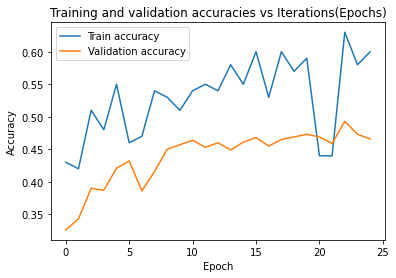

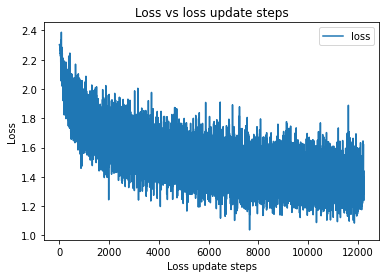

In [15]:
from solution import find_best_model
from solution1 import *
# your implementation here

train_loader, test_loader, val_loader, classes = get_cifar10_dataset(val_size=1000, batch_size=100)
X_val, y_val = next(iter(val_loader))
X_test, y_test = next(iter(test_loader))

net = NeuralNetworkModel(3072,50,10)
params = find_best_model()
results = net.train(train_loader, X_val, y_val, learning_rate=params["lr"], learning_rate_decay=params["lr_decay"],reg=params["reg"], num_epochs=params["epoch"], verbose=True)
val_acc_plot(results)
loss_plot(results)

## 4 Data Augmentation in Natural Language Processing (NLP) (2.5 pts)

You have learned about data augmentation as a regularization technique to reduce overfitting. For image data, you can do various transformations. For natural language processing problems, this is not as straight-forward.

Read about [Data Augmentation in NLP by Shahul E.S.](https://neptune.ai/blog/data-augmentation-nlp). For a fuller picture, you can also have a look at [the Visual Survey of Data Augmentation in NLP by Amit Chaudhary](https://amitness.com/2020/05/data-augmentation-for-nlp/). 

After consulting the above resources, answer the following questions:


1. In computer vision, data augmentation happens on the go, whereas in NLP data is augmented before training. Why is it so? Explain in 3-4 sentences. (0.5 pts)

2. Data augmentation in NLP is very task-specific and should be applied carefully. Provide an example of a augmentation method  and task pair where data augmentation might harm the model. Justify your answer (2-4 sentences). A (non-exhaustive) list of NLP tasks you can be found at the [Natural Language Understanding Wiki](https://natural-language-understanding.fandom.com/wiki/List_of_natural_language_processing_tasks). You can also give an example with a task not from this list. (1 pt)

3. If we perform K-fold cross-validation, do we augment data before or after splitting the data? Why? Give at least *two* reasons. (0.5 pts)

4. Does the proportion of augmented data depend on the size of the training dataset? Ex- plain why. Hint: think about the relation between training dataset size and overfitting. (0.5 pts)



## 4 <font color="red">To Do</font>



1.

In NLP, data augmentation should be done carefully due to the grammatical structure of the text. Also, the augmeted data should preserve the context of the text data. So, we have to do augmentation before the training and can't happen on the go.

2.

In sentimental analysis, if we apply random deletion augmentation method, it can delete few important words from the sentence and it can be difficult for classifier to learn from this data. In this case, it can decrese the performance.
Similarly, when augmenting the context in a question answering dataset, the random deletion can remove the answer and can impact the performance of the model.

Also, In document-level machine translation tasks, if we apply Shuffle Sentences Transform, it can suffle the order of sentences and can change the context. This can give bad translations in the target language.

3.

We need to do data augmentation after spliting the data. So that, we can keep the original sample and augmented sample in the same fold and also avoid overfitting.

4.

Yes, the proportion of augmented data depends on the size of the training dataset. If the training dataset size is very small, we need to have large amount of augmented data. By this, we can reduce the overfitting. If the training dataset is large enough there is no need to have large amount of augmented data.